In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as colorList

In [ ]:

# unzip file
path = 'TikTok-300d-170h.vec'
if os.path.exists(path):
    os.remove(path)

print('unzip ../'+path[:-3]+'zip')
os.system('unzip ../'+path[:-3]+'zip')

In [65]:
# loading data and saving as csv file

save_path = './save.csv'
if os.path.exists(save_path):
    os.remove(save_path)
    open(save_path, 'w', encoding='utf_8_sig')


with open(path, 'r',encoding='utf_8_sig') as f:
    for line in f.readlines():
        x = line.split(' ')
        # remove '/n'
        x[-1] = x[-1][:-1]
    
        # print(str(x)[1:-1]
        # build vector
        s = x[0]
        v = x[1:]
        v = [float(i) for i in v]
        x = [s] + v
        # print(str(x)[1:-1])
        with open(save_path, 'a',encoding='utf_8_sig') as f2:
            f2.write(str(x)[1:-1]+'\r')

PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: './save.csv'

In [132]:
pathd = 'saves.csv'
df = pd.read_csv(pathd, encoding='utf_8_sig', header=None)
train_y , train_x = df.loc[:,0], df.loc[:, 1:]
print(train_x.shape,'\n',  train_y.shape)

(29632, 300) 
 (29632,)


In [133]:
# normalization  mean -> 0

def normal(x):
    m = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - m)/std

train_xm = normal(train_x)

print(train_xm.shape)

(29632, 300)


In [134]:
from scipy.spatial.distance import pdist, squareform


def central(K):
    N = K.shape[0]
    one_n = np.ones(N, N)/K

    # centralization
    K = k - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    return K

def linear(X):
    K = np.dot(X, X.T)
    K = central(K)
    return K

def polynomial(K):
    pass

def gaussianRBF(X, sigma=15):
    pass


def K_PCA(x, num_f, plot=False, info=False, kernal=None):

    # engenvalue and eigenvector
    if kernal == None:
        eigen_w, eigen_v = np.linalg.eig(np.cov(x.T))
    else:
        K = kernal(x)
        eigen_w, eigen_v = np.linalg.eig(K)
        


    if info:
        print('the number of eigen values: {0} \n \
               the number of eigen vectors{1} \n \
               the size of eingen vectors'. format(eigen_w.shape[0], 
                                                   eigen_v.shape[0],
                                                   eigen_v.shape[1]))

    # sort
    oder = np.argsort(eigen_w)[::-1]

    eigen_w_sorted = eigen_w[oder]
    eigen_v_sorted = eigen_v[:, oder]


    # plot X = features, Y = Variance
    if plot:
        # print top 15 features
        pd.DataFrame(eigen_w_sorted[:15]).plot(kind='bar')
    
    if kernal == None:
        v = eigen_v_sorted[:, :num_f]
        x_new = x.dot(v)
    else:
        for i in range(0, num_f):
            eigen_v_sorted[:, i] = eigen_v_sorted[:, i] / np.sqrt(eigen_w_sorted[i])
            eigen_v_sorted = eigen_v_sorted[:, :num_f]
            x_new = K.dot(eigen_v_sorted)


    return x_new


the number of eigen values: 300 
                the number of eigen vectors300 
                the size of eingen vectors


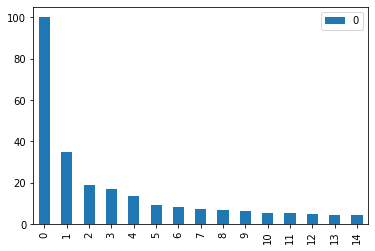

In [136]:
train_xa = K_PCA(train_xm, 1, plot=True, info=True)

In [141]:
## plot
train_xa['word'] = train_y

print(train_xa)

train_xa.to_csv('./PCA_result.csv', index=False, encoding='utf_8_sig')

0 word
0      43.458984    的
1      45.589291   捂脸
2      45.258112    了
3      62.980606    我
4      60.303366    你
...          ...  ...
29627  -5.150230   生虫
29628  -5.719998   袭警
29629  -5.540994  电子琴
29630  -5.724108   洗掉
29631  -6.212612   恶棍

[29632 rows x 2 columns]
